In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", None)

# Intro to Machine Learning

Predicting customer churn using Logistic Regression

Steps:

- 1. Data Cleaning
- 2. Split dataset into training and test set
- 3. Data Preprocessing
- 4. Feature Selection
- 5. Train Model
- 6. Validate Model

## 1. Data Cleaning


In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Missing values**

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.replace("", np.nan).isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.replace(" ", np.nan).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 rows in df, in which TotalCharges are whitespaces

In [13]:
df.loc[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
df.loc[df["tenure"] == 1, "Contract"].value_counts()

Month-to-month    604
One year            7
Two year            2
Name: Contract, dtype: int64

Impute missing values in `TotalCharges` with 0, as those customers have not been charged anything yet

In [18]:
df.loc[df["TotalCharges"] == " ", "TotalCharges"] = 0

In [19]:
df.replace(" ", np.nan).isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Casting features to appropriate types**

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

Look at binary columns

In [28]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [32]:
df.nunique()[df.nunique() == 3]

MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
dtype: int64

In [37]:
df[["OnlineBackup", "DeviceProtection"]].apply(pd.value_counts)

,OnlineBackup,DeviceProtection
No,3088,3095
Yes,2429,2422
No internet service,1526,1526


In [39]:
df.nunique()[df.nunique() == 3].keys()

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract'],
      dtype='object')

In [40]:
df[df.nunique()[df.nunique() == 3].keys()].apply(pd.value_counts)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
DSL,NaN,2421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month-to-month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875.0
No,3390.0,1526.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,NaN
No internet service,NaN,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0,NaN
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
One year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473.0
Two year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1695.0
Yes,2971.0,NaN,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0,NaN


In [42]:
cat_cols = ["InternetService", "Contract"]

In [47]:
[col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_cols]

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [49]:
df[[col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_cols]].apply(pd.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3390.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0
No internet service,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2971.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0


In [53]:
to_bool = df.nunique()[df.nunique() == 3].keys().to_list()

In [56]:
df[[col for col in to_bool if col not in cat_cols]] = np.where(df[[col for col in to_bool if col not in cat_cols]] == "Yes", 1, 0)

In [58]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [59]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [168]:
id_col = ["customerID"]
target_col = ["Churn"]
cat_cols = [col for col in df.nunique()[df.nunique() < 5].keys() if col not in target_col]
num_cols = [col for col in df.columns if col not in id_col + target_col + cat_cols]
bool_cols = [col for col in df.nunique()[df.nunique() == 2].keys() if col not in target_col]

## 2. Split dataset into training and test

In [63]:
from sklearn.model_selection import train_test_split

In [116]:
train, test = train_test_split(df, test_size=.2, random_state=3)

train_X = train[cat_cols + num_cols].reset_index(drop=True)
train_y = train[target_col].reset_index(drop=True)
test_X = test[cat_cols + num_cols].reset_index(drop=True)
test_y = test[target_col].reset_index(drop=True)

## 3. Data preprocessing

**Apply standard scaling to numerical columns**

In [117]:
from sklearn.preprocessing import StandardScaler

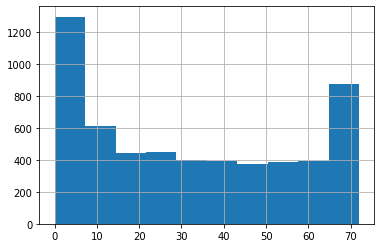

In [120]:
train_X["tenure"].hist();

In [121]:
std = StandardScaler()
scaled_fit = std.fit(train_X[num_cols])

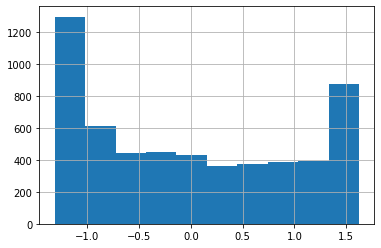

In [127]:
pd.DataFrame(scaled_fit.transform(train_X[num_cols]), columns=num_cols)["tenure"].hist();

In [128]:
# standardize
scaled = pd.DataFrame(scaled_fit.transform(train_X[num_cols]), columns=num_cols)

train_X = train_X.drop(columns=num_cols, axis=1)
train_X = train_X.merge(scaled, left_index=True, right_index=True, how="inner")

**Create dummy variables from categorical features, except for booleans**

In [132]:
train_X["InternetService"].value_counts()

Fiber optic    2491
DSL            1944
No             1199
Name: InternetService, dtype: int64

In [134]:
pd.get_dummies(train_X["InternetService"], drop_first=True)

,Fiber optic,No
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
5629,0,0
5630,0,1
5631,0,1
5632,0,1


In [136]:
train_X = pd.get_dummies(data=train_X,
                         columns=[col for col in cat_cols if col not in bool_cols],
                         drop_first=True)

In [154]:
train_X = train_X.assign(Female=np.where(train_X["gender"] == "Female", 1, 0))
train_X = train_X.drop(columns="gender")

In [169]:
bool_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [170]:
bool_cols.pop(0)

'gender'

In [177]:
train_X[train_X[bool_cols].dtypes[train_X[bool_cols].dtypes == "object"].keys()]

,Partner,Dependents,PhoneService,PaperlessBilling
0,No,No,No,No
1,No,No,Yes,Yes
2,Yes,Yes,Yes,Yes
3,Yes,Yes,Yes,Yes
4,Yes,Yes,Yes,No
...,...,...,...,...
5629,No,No,Yes,No
5630,No,No,Yes,Yes
5631,Yes,No,Yes,No
5632,No,No,Yes,No


In [184]:
train_X[train_X[bool_cols].dtypes[train_X[bool_cols].dtypes == "object"].keys()]

,Partner,Dependents,PhoneService,PaperlessBilling
0,No,No,No,No
1,No,No,Yes,Yes
2,Yes,Yes,Yes,Yes
3,Yes,Yes,Yes,Yes
4,Yes,Yes,Yes,No
...,...,...,...,...
5629,No,No,Yes,No
5630,No,No,Yes,Yes
5631,Yes,No,Yes,No
5632,No,No,Yes,No


In [185]:
train_X[train_X[bool_cols].dtypes[train_X[bool_cols].dtypes == "object"].keys()] = np.where(train_X[train_X[bool_cols].dtypes[train_X[bool_cols].dtypes == "object"].keys()] == "Yes", 1, 0)

In [186]:
train_X

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Female
0,0,0,0,0,0,0,1,0,0,0,0,0,0.562348,-1.152779,-0.393412,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,1,0,1,1,1,0.603156,1.385213,1.267176,1,0,0,0,0,1,0,1
2,0,1,1,1,1,0,1,0,0,1,1,1,-0.008967,1.133415,0.364029,1,0,0,0,0,1,0,1
3,1,1,1,1,1,0,0,0,0,1,1,1,0.317498,0.990007,0.608099,1,0,0,0,1,0,0,1
4,1,1,1,1,1,1,0,1,1,1,0,0,0.929621,0.379688,0.835885,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,0,1,0,1,1,1,1,1,0,0,1.582553,0.416374,1.454222,0,0,0,1,1,0,0,1
5630,0,0,0,1,1,0,0,0,0,0,0,1,-0.743515,-1.336208,-0.862365,0,1,1,0,1,0,0,0
5631,0,1,0,1,1,0,0,0,0,0,0,0,1.296895,-1.311195,-0.245047,0,1,0,1,0,0,1,1
5632,0,0,0,1,0,0,0,0,0,0,0,0,0.317498,-1.491289,-0.648292,0,1,0,1,0,0,1,1


Wrap all preprocessing steps into a function

In [143]:
def preprocess(X, trained_standardization_factors):
    scaled_X = trained_standardization_factors.transform(X[num_cols])
    scaled_X = pd.DataFrame(scaled_X, columns=num_cols)
    
    X = X.drop(columns=num_cols, axis=1)
    X = X.merge(scaled, left_index=True, right_index=True, how="inner")
    
    X = pd.get_dummies(data=X,
                       columns=[col for col in cat_cols if col not in bool_cols], # <- what is this?
                       drop_first=True)

    
    return X

In [144]:
preprocess(test_X, scaled_fit)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Male,0,Yes,No,Yes,1,0,1,0,0,1,1,Yes,0.562348,-1.152779,-0.393412,1,0,0,0,0,1,0
1,Male,0,No,No,Yes,0,0,0,0,0,0,0,Yes,0.603156,1.385213,1.267176,0,1,0,0,0,1,0
2,Male,0,No,No,Yes,0,0,0,0,0,1,1,Yes,-0.008967,1.133415,0.364029,1,0,0,0,0,1,0
3,Female,0,Yes,No,Yes,0,1,0,0,0,0,0,Yes,0.317498,0.990007,0.608099,1,0,0,0,0,1,0
4,Female,0,Yes,No,No,0,1,0,1,1,0,1,Yes,0.929621,0.379688,0.835885,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Male,0,No,No,Yes,0,0,0,0,0,0,0,No,1.378512,0.909965,1.678773,0,1,0,0,0,0,1
1405,Male,0,Yes,Yes,Yes,0,0,0,0,0,0,0,No,-0.906747,-1.501294,-0.919367,0,1,0,1,0,0,1
1406,Female,0,No,No,Yes,1,0,0,0,0,0,0,No,0.235882,-1.489621,-0.674345,0,1,1,0,0,1,0
1407,Female,1,No,No,Yes,0,0,0,0,0,0,0,No,-0.865939,0.978334,-0.561870,0,0,0,0,0,0,1


## 4. Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklear.metrics import accuracy_score

# train model
lr = LogisticRegression()
lr.fit(train_X)